<a href="https://colab.research.google.com/github/seun829/DataScience/blob/main/Unit6/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

In [1]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 12.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import bambi as bmb
import arviz as az
import graphviz as gv

**Task1**:

Does elpd_loo mean anything if we only have one model?

elpd_loo is used for the purpose of comparing two models where a higher value would indicate a better model, but without 2 models it doesn't really mean anything.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when a model is too rooted in the data and exact measures that it fails to follow general patterns.

**Task3**:

How do we mitigate overfitting?

We can mitigate overfitting by choosing to omit certain collumns in the data or testing it in different contexts regularlly.

**Task4**:

How do we mitigate underfitting?

We can mitigate underfitting by using all available collumns and finding new correlated features for the model to train on.

**Task5**:

Why would we want more than one predictor in a model?

We want to avoid underfitting the model and taking into account that in data, there are almost always multiple factors that lead to an outcome.

**Task6**:

Can we have too many predictors? How would we know?

If there is a lot of noise in the predictors, than yes you can have too many predictors. However, if all of the predictors are useful factors and have balanced noise there isn't necessarily a limit on how many predictors to use.

**Task7**:

What is variable selection, and how does it work?

It is the process of selecting features for your model to train on. You choose a feature, evaluate whether it has correlation or important for predicting something.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

The similarities between the three models are that they all use the two predictors in some way. However, the 1st and 3rd add the variables while the 2nd uses the categorical as a hierarchy upon the other. The third and second take into account how the categorical variable relates to the other variable while the first doesn't.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

You can use the plot_predictions method from the bambi library. We can pretty much visualize the entire model if there are 3 variables as we are plotting the x and y axis and plotting another variable on the plane.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [3]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [4]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

predictors free throw percentage and position (with position as a categorical predictor)

In [15]:
#define the model
model1 = bmb.Model("FGp ~ FTp + Pos", data=bb)
#fit the model
idata1 = model1.fit(idata_kwargs={'log_likelihood': True}, progressbar=False)

predictors free throw percentage and position (with position as a hierarchy)

In [18]:
#define the model
model2 = bmb.Model("FGp ~ FTp + (1|Pos)", data=bb)
#fit the model
idata2 = model2.fit(idata_kwargs={'log_likelihood': True}, progressbar=False)

ERROR:pymc.stats.convergence:There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


predictors free throw percentage and position (with position interacting with frew throw percentage)

In [19]:
#define the model
model3 = bmb.Model("FGp ~ FTp * Pos", data=bb)
#fit the model
idata3 = model3.fit(idata_kwargs={'log_likelihood': True}, progressbar=False)

predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors

In [23]:
#define the model
model4 = bmb.Model("FGp ~ FTp * Pos * `3PA`", data=bb)
#fit the model
idata4 = model4.fit(idata_kwargs={'log_likelihood': True}, progressbar=False)

predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

In [22]:
model5 = bmb.Model("FGp ~ FTp + Pos + `3PA` + `3PA`:Pos", data=bb)
idata5 = model5.fit(idata_kwargs={'log_likelihood': True}, progressbar=False)

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
FGp ~ FTp * Pos * `3PA`,0,530.463918,21.454380,0.000000,4.260558e-01,14.382666,0.000000,False,log
FGp ~ FTp + Pos + `3PA` + `3PA`:Pos,1,530.140452,12.473369,0.323466,5.739442e-01,15.851574,5.933810,False,log
FTp * Pos,2,509.326805,13.762163,21.137114,0.000000e+00,16.692960,8.492754,True,log
FTp + (1|Pos),3,507.247383,8.404718,23.216535,2.581616e-15,16.128500,8.450640,False,log
FTp + Pos,4,507.107359,8.518836,23.356559,0.000000e+00,16.117472,8.419992,False,log


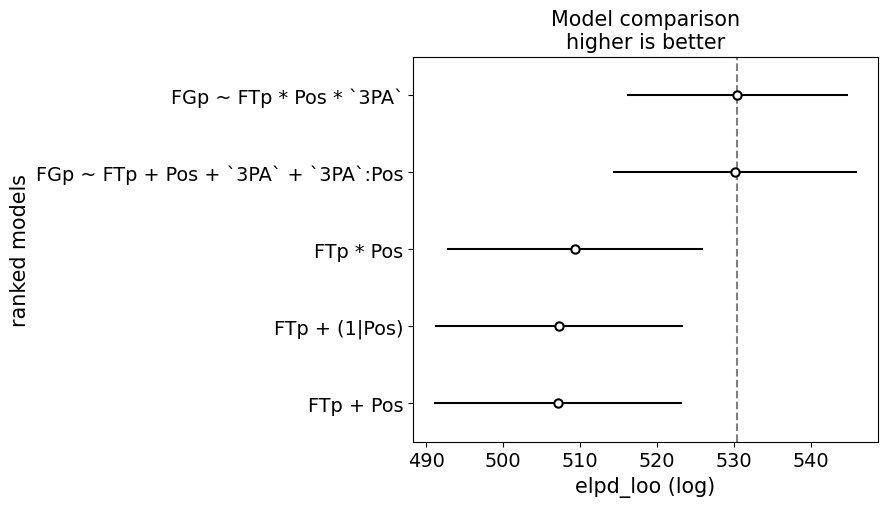

In [24]:
model_dict = {
    "FTp + Pos": idata1,
    "FTp + (1|Pos)": idata2,
    "FTp * Pos": idata3,
    "FGp ~ FTp * Pos * `3PA`": idata4,
    "FGp ~ FTp + Pos + `3PA` + `3PA`:Pos": idata5
}

# Compare the models
compare_df = az.compare(model_dict)

# Plot the comparison
az.plot_compare(compare_df)

compare_df

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

According to the metric, FTp * Pos * '3PA' has the highest elpd_loo, making it technically better. I think that is because these are the most vital and important variables to track.

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

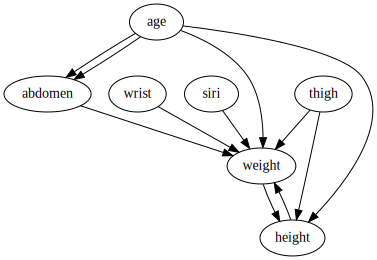

In [17]:
dag_g = gv.Digraph(comment = "body_dag")

dag_g.node('S', 'siri')
dag_g.node('A', 'age')
dag_g.node('W', 'weight')
dag_g.node('H', 'height')
dag_g.node('B', 'abdomen')
dag_g.node('T', 'thigh')
dag_g.node('R', 'wrist')

dag_g.edges([('A', 'W'), ('A', 'H'), ('A', 'B'), ('A', 'B'), ('S', 'W'), ('H', 'W'), ('W', 'H'), ('B', 'W'), ('T', 'W'), ('R', 'W'), ('T', 'H')])

dag_g

I think based off of this, predicting weight would be the best option because that is the factor with the most factors leading to a change in that.

In [13]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [14]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7
